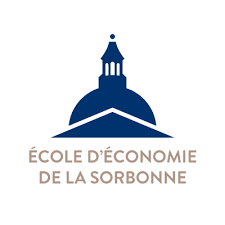

# Event Study Applicatiion: 
## Impact of the Inflation Reduction Actapproval on United States Stock Market

- #### Camilo Saldarriaga

* [1. Importing data](#chapter1)

* [2. Data preparation](#chapter2)
    * [2.1 Merging data](#section_2_1)
    * [2.2 Creating the dummy variables](#section_2_2)
    * [2.3 Calculating returns](#section_2_3)
* [3. Descriptive statistics](#chapter3)
* [4. Mean adjusted return model for market portfolio after the events](#chapter4)
* [5. Mean adjusted return model for market portfolio before the events](#chapter5)
* [6. Market Return model after the events](#chapter6)
* [7. Market Return model before the events](#chapter7)
 

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import statsmodels.api as sm
import yfinance as yfin
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Importing data<a id="chapter1"></a>

First I define the dates for the analysis

In [2]:
start = dt.date(2017,12,31)
end = dt.date(2022,12,31)

I import the files for the indexes and the Risk Market Premium

In [3]:
RF = pd.read_csv("F-F_Research_Data_Factors_daily.csv")[["Date", "Mkt-RF", "RF"]]
RF["Mkt"] = RF["Mkt-RF"] + RF["RF"]
RF["Mkt"]= RF["Mkt"]/100

RF 

,Date,Mkt-RF,RF,Mkt
0,19260701,0.10,0.009,0.00109
1,19260702,0.45,0.009,0.00459
2,19260706,0.17,0.009,0.00179
3,19260707,0.09,0.009,0.00099
4,19260708,0.21,0.009,0.00219
...,...,...,...,...
25603,20231025,-1.58,0.021,-0.01559
25604,20231026,-1.15,0.021,-0.01129
25605,20231027,-0.53,0.021,-0.00509
25606,20231030,1.15,0.021,0.01171


In [4]:
RF["Date"] = pd.to_datetime(RF["Date"], format ="%Y%m%d").dt.strftime("%Y-%m-%d")

RF

,Date,Mkt-RF,RF,Mkt
0,1926-07-01,0.10,0.009,0.00109
1,1926-07-02,0.45,0.009,0.00459
2,1926-07-06,0.17,0.009,0.00179
3,1926-07-07,0.09,0.009,0.00099
4,1926-07-08,0.21,0.009,0.00219
...,...,...,...,...
25603,2023-10-25,-1.58,0.021,-0.01559
25604,2023-10-26,-1.15,0.021,-0.01129
25605,2023-10-27,-0.53,0.021,-0.00509
25606,2023-10-30,1.15,0.021,0.01171


Now, I import the ^ECO index

In [5]:
ECO = pd.read_csv("ECO index .csv")
ECO

,Date,^ECO
0,1/2/2018 16:00,53.91
1,1/3/2018 16:00,53.88
2,1/4/2018 16:00,53.80
3,1/5/2018 16:00,53.79
4,1/8/2018 16:00,53.87
...,...,...
1153,12/23/2022 16:00,80.47
1154,12/27/2022 16:00,77.00
1155,12/28/2022 16:00,76.02
1156,12/29/2022 16:00,79.23


In [6]:
pd.to_datetime(ECO["Date"], format = "%m/%d/%Y %H:%M")

0      2018-01-02 16:00:00
1      2018-01-03 16:00:00
2      2018-01-04 16:00:00
3      2018-01-05 16:00:00
4      2018-01-08 16:00:00
               ...        
1153   2022-12-23 16:00:00
1154   2022-12-27 16:00:00
1155   2022-12-28 16:00:00
1156   2022-12-29 16:00:00
1157   2022-12-30 16:00:00
Name: Date, Length: 1158, dtype: datetime64[ns]

In [7]:
ECO["Date"]= pd.to_datetime(ECO["Date"], format = "%m/%d/%Y %H:%M").dt.strftime("%Y-%m-%d")
ECO

,Date,^ECO
0,2018-01-02,53.91
1,2018-01-03,53.88
2,2018-01-04,53.80
3,2018-01-05,53.79
4,2018-01-08,53.87
...,...,...
1153,2022-12-23,80.47
1154,2022-12-27,77.00
1155,2022-12-28,76.02
1156,2022-12-29,79.23


Now, I import the "^SP500-251020" Ticker.

In [8]:
tickers = ["^SP500-251020"]

In [9]:
yfin.pdr_override()

elec_v_prices = pdr.get_data_yahoo(tickers, start, end)["Adj Close"]
elec_v_prices = pd.DataFrame(elec_v_prices)
elec_v_prices.reset_index(inplace = True)
elec_v_prices

[*********************100%%**********************]  1 of 1 completed


,Date,Adj Close
0,2018-01-02,112.620003
1,2018-01-03,114.000000
2,2018-01-04,116.709999
3,2018-01-05,117.410004
4,2018-01-08,117.580002
...,...,...
1246,2022-12-23,56.040001
1247,2022-12-27,50.869999
1248,2022-12-28,51.869999
1249,2022-12-29,55.630001


In [10]:
elec_v_prices.rename(columns={"Adj Close": "^SP500-251020"}, inplace = True )

# 2. Data preparation<a id="chapter2"></a>

## 2.1 Merging data <a id="section_2_1"></a>

In [11]:
RF["Date"] = pd.to_datetime(RF["Date"])
ECO["Date"] = pd.to_datetime(ECO["Date"])
elec_v_prices["Date"] = pd.to_datetime(elec_v_prices["Date"])

In [12]:
elec_v_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1251 non-null   datetime64[ns]
 1   ^SP500-251020  1251 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.7 KB


In [13]:
DF1 =pd.merge(ECO, RF , how ="inner", on = "Date")
DF1

,Date,^ECO,Mkt-RF,RF,Mkt
0,2018-01-02,53.91,0.85,0.006,0.00856
1,2018-01-03,53.88,0.59,0.006,0.00596
2,2018-01-04,53.80,0.42,0.006,0.00426
3,2018-01-05,53.79,0.66,0.006,0.00666
4,2018-01-08,53.87,0.19,0.006,0.00196
...,...,...,...,...,...
1153,2022-12-23,80.47,0.51,0.016,0.00526
1154,2022-12-27,77.00,-0.51,0.016,-0.00494
1155,2022-12-28,76.02,-1.23,0.016,-0.01214
1156,2022-12-29,79.23,1.87,0.016,0.01886


In [14]:
DF2 =pd.merge(DF1, elec_v_prices , how ="inner", on = "Date")
DF2

,Date,^ECO,Mkt-RF,RF,Mkt,^SP500-251020
0,2018-01-02,53.91,0.85,0.006,0.00856,112.620003
1,2018-01-03,53.88,0.59,0.006,0.00596,114.000000
2,2018-01-04,53.80,0.42,0.006,0.00426,116.709999
3,2018-01-05,53.79,0.66,0.006,0.00666,117.410004
4,2018-01-08,53.87,0.19,0.006,0.00196,117.580002
...,...,...,...,...,...,...
1145,2022-12-23,80.47,0.51,0.016,0.00526,56.040001
1146,2022-12-27,77.00,-0.51,0.016,-0.00494,50.869999
1147,2022-12-28,76.02,-1.23,0.016,-0.01214,51.869999
1148,2022-12-29,79.23,1.87,0.016,0.01886,55.630001


## 2.2 Creating the dummy variables <a id="section_2_2"></a>

First, I create the dummies for the analysis of the impact after the event, where:

- D1 corresponds to the bill presentation
- D2 corresponds to the announcement of Senator's Manchin opposition to the bill 
- D3 corresponds to the agreement with Senator Manchin
- D4 corresponds to the Senate approval of the bill

In [15]:
DF2["D1"] = 0
DF2["D2"] = 0
DF2["D3"] = 0
DF2["D4"] = 0

mask1 = ((DF2["Date"]=="2021-09-27") | (DF2["Date"]=="2021-09-28") | (DF2["Date"]=="2021-09-29") | (DF2["Date"]=="2021-09-30") )
mask2 = ((DF2["Date"]=="2021-12-20") | (DF2["Date"]=="2021-12-21") | (DF2["Date"]=="2021-12-22") | (DF2["Date"]=="2021-12-23") )
mask3 = ((DF2["Date"]=="2022-07-27") | (DF2["Date"]=="2022-07-28") | (DF2["Date"]=="2022-07-29") | (DF2["Date"]=="2022-08-01") )
mask4 = ((DF2["Date"]=="2022-08-08") | (DF2["Date"]=="2022-08-09") | (DF2["Date"]=="2022-08-10") | (DF2["Date"]=="2022-08-11") )

DF2.loc[mask1, 'D1'] = 1
DF2.loc[mask2, 'D2'] = 1
DF2.loc[mask3, 'D3'] = 1
DF2.loc[mask4, 'D4'] = 1


print(DF2["D1"].value_counts())
print(DF2["D2"].value_counts())
print(DF2["D3"].value_counts())
print(DF2["D4"].value_counts())


D1
0    1146
1       4
Name: count, dtype: int64
D2
0    1146
1       4
Name: count, dtype: int64
D3
0    1146
1       4
Name: count, dtype: int64
D4
0    1146
1       4
Name: count, dtype: int64


Second, I create the dummies to evaluate if there was abnormal returns in the days after the event. Where:

- D5 corresponds to the days before the bill presentation
- D6 corresponds to the days before the announcement of Senator's Manchin opposition to the bill 
- D7 corresponds to the days before the agreement with Senator Manchin
- D8 corresponds to the days before the Senate approval of the bill



In [16]:
DF2["D5"] = 0
DF2["D6"] = 0
DF2["D7"] = 0
DF2["D8"] = 0

mask1 = ((DF2["Date"]=="2021-09-22") | (DF2["Date"]=="2021-09-23") | (DF2["Date"]=="2021-09-24"))
mask2 = ((DF2["Date"]=="2021-12-15") | (DF2["Date"]=="2021-12-16") | (DF2["Date"]=="2021-12-17"))
mask3 = ((DF2["Date"]=="2022-07-26") | (DF2["Date"]=="2022-07-25") | (DF2["Date"]=="2022-07-22"))
mask4 = ((DF2["Date"]=="2022-08-03") | (DF2["Date"]=="2022-08-04") | (DF2["Date"]=="2022-08-15"))

DF2.loc[mask1, 'D5'] = 1
DF2.loc[mask2, 'D6'] = 1
DF2.loc[mask3, 'D7'] = 1
DF2.loc[mask4, 'D8'] = 1


print(DF2["D5"].value_counts())
print(DF2["D6"].value_counts())
print(DF2["D7"].value_counts())
print(DF2["D8"].value_counts())

D5
0    1147
1       3
Name: count, dtype: int64
D6
0    1147
1       3
Name: count, dtype: int64
D7
0    1147
1       3
Name: count, dtype: int64
D8
0    1147
1       3
Name: count, dtype: int64


## 2.3 Calculating returns <a id="section_2_3"></a>

To obtain the returns of the ECO Index and the S&P 500 Automobiles Industry index, I apply the log transformation and then obtain the first differences.

In [17]:
DF2["ln_^ECO"] = np.log(DF2["^ECO"])
DF2["^SP500-251020"] = np.log(DF2["^SP500-251020"])

DF2["Ret_^ECO"] = DF2["ln_^ECO"].diff()
DF2["Ret_^SP500-251020"] = DF2["^SP500-251020"].diff()

DF2.drop(0, inplace = True)

# 3. Descriptive statistics <a id="chapter3">

# 4. Mean adjusted return model for market portfolio after the events<a id="chapter4"></a>

In [18]:
DF2

,Date,^ECO,Mkt-RF,RF,Mkt,^SP500-251020,D1,D2,D3,D4,D5,D6,D7,D8,ln_^ECO,Ret_^ECO,Ret_^SP500-251020
1,2018-01-03,53.88,0.59,0.006,0.00596,4.736198,0,0,0,0,0,0,0,0,3.986759,-0.000557,0.012179
2,2018-01-04,53.80,0.42,0.006,0.00426,4.759692,0,0,0,0,0,0,0,0,3.985273,-0.001486,0.023494
3,2018-01-05,53.79,0.66,0.006,0.00666,4.765672,0,0,0,0,0,0,0,0,3.985088,-0.000186,0.005980
4,2018-01-08,53.87,0.19,0.006,0.00196,4.767119,0,0,0,0,0,0,0,0,3.986574,0.001486,0.001447
5,2018-01-09,53.47,0.15,0.006,0.00156,4.763967,0,0,0,0,0,0,0,0,3.979121,-0.007453,-0.003152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2022-12-23,80.47,0.51,0.016,0.00526,4.026066,0,0,0,0,0,0,0,0,4.387884,-0.010385,-0.012414
1146,2022-12-27,77.00,-0.51,0.016,-0.00494,3.929273,0,0,0,0,0,0,0,0,4.343805,-0.044079,-0.096792
1147,2022-12-28,76.02,-1.23,0.016,-0.01214,3.948741,0,0,0,0,0,0,0,0,4.330996,-0.012809,0.019467
1148,2022-12-29,79.23,1.87,0.016,0.01886,4.018723,0,0,0,0,0,0,0,0,4.372355,0.041359,0.069982


In [19]:
x = DF2[['D1', "D2", "D3", "D4"]]
y = DF2['Mkt']

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

csv_data =result.summary().as_csv()

with open('result1.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:                    Mkt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.321
Date:                Wed, 10 Jan 2024   Prob (F-statistic):              0.260
Time:                        18:04:08   Log-Likelihood:                 3234.9
No. Observations:                1149   AIC:                            -6460.
Df Residuals:                    1144   BIC:                            -6435.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.838      0.4

# 5. Mean adjusted return model for market portfolio before the events<a id="chapter5"></a>

In [20]:
x = DF2[['D5', "D6", "D7", "D8"]]
y = DF2['Mkt']

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())


csv_data =result.summary().as_csv()

with open('result2.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:                    Mkt   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5919
Date:                Wed, 10 Jan 2024   Prob (F-statistic):              0.669
Time:                        18:04:08   Log-Likelihood:                 3233.4
No. Observations:                1149   AIC:                            -6457.
Df Residuals:                    1144   BIC:                            -6432.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.923      0.3

# 6. Market Return model after the events<a id="chapter6"></a>

First I analyze the events for the clean energy sector with the ^ECO index

In [27]:
x = DF2[["Mkt-RF", 'D1', "D2", "D3", "D4"]]
y = DF2['Ret_^ECO']

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

csv_data =result.summary().as_csv()

with open('result3.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:               Ret_^ECO   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     242.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.96e-176
Time:                        18:09:41   Log-Likelihood:                 2869.7
No. Observations:                1149   AIC:                            -5727.
Df Residuals:                    1143   BIC:                            -5697.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.392      0.6

Now, I evaluate the case of the automotive industry with the S&P 500 Automobiles Industry index

In [25]:
x = DF2[["Mkt-RF", 'D1', "D2", "D3", "D4"]]
y = DF2["Ret_^SP500-251020"]

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

with open('result4.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:      Ret_^SP500-251020   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     168.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.88e-134
Time:                        18:08:24   Log-Likelihood:                 2723.9
No. Observations:                1149   AIC:                            -5436.
Df Residuals:                    1143   BIC:                            -5406.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.871      0.0

# 7. Market Return model before the events<a id="chapter7"></a>

First I analyze the events for the clean energy sector with the ^ECO index

In [28]:
x = DF2[["Mkt-RF", 'D5', "D6", "D7", "D8"]]
y = DF2['Ret_^ECO']

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

with open('result5.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:               Ret_^ECO   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     240.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.71e-176
Time:                        18:09:53   Log-Likelihood:                 2868.2
No. Observations:                1149   AIC:                            -5724.
Df Residuals:                    1143   BIC:                            -5694.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.173      0.8

Now, I evaluate the case of the automotive industry with the S&P 500 Automobiles Industry index

In [26]:
x = DF2[["Mkt-RF", 'D5', "D6", "D7", "D8"]]
y = DF2["Ret_^SP500-251020"]

x = sm.add_constant(x)


result = sm.OLS(y, x).fit()
print(result.summary())

with open('result6.csv', 'w') as f:
    f.write(csv_data)

                            OLS Regression Results                            
Dep. Variable:      Ret_^SP500-251020   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.18e-132
Time:                        18:08:36   Log-Likelihood:                 2720.5
No. Observations:                1149   AIC:                            -5429.
Df Residuals:                    1143   BIC:                            -5399.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.001     -1.624      0.1